In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm

In [3]:
gdp = pd.read_csv("gdp-per-capita-vs-economic-inequality.csv")

In [4]:
gdp.head()

,Entity,Code,Year,Gini coefficient,"GDP per capita (expenditure, multiple price benchmarks)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,-10000,NaN,NaN,14737.0,NaN
2,Afghanistan,AFG,-9000,NaN,NaN,20405.0,NaN
3,Afghanistan,AFG,-8000,NaN,NaN,28253.0,NaN
4,Afghanistan,AFG,-7000,NaN,NaN,39120.0,NaN


In [5]:
gdp.dropna(inplace = True)

In [6]:
gdp.head()

,Entity,Code,Year,Gini coefficient,"GDP per capita (expenditure, multiple price benchmarks)",Population (historical estimates),Continent
526,Albania,ALB,2015,0.327537,11083.823,2882482.0,Europe
2361,Armenia,ARM,2015,0.323568,10704.472,2878598.0,Asia
3249,Austria,AUT,2015,0.305328,51712.440,8642422.0,Europe
4804,Belarus,BLR,2015,0.256332,19615.960,9700609.0,Europe
5062,Belgium,BEL,2015,0.277295,47059.684,11248306.0,Europe


In [7]:
rate = pd.read_csv("TI-corruption-perception-index.csv")

In [8]:
rate.head()

,Entity,Code,Year,Corruption Perception Index - Transparency International (2018)
0,Afghanistan,AFG,2012,8
1,Afghanistan,AFG,2013,8
2,Afghanistan,AFG,2014,12
3,Afghanistan,AFG,2015,11
4,Afghanistan,AFG,2016,15


In [9]:
#Joining the two datasets
dataset = pd.merge(gdp, rate, on=["Code", "Year"])

In [10]:
dataset.head()

,Entity_x,Code,Year,Gini coefficient,"GDP per capita (expenditure, multiple price benchmarks)",Population (historical estimates),Continent,Entity_y,Corruption Perception Index - Transparency International (2018)
0,Albania,ALB,2015,0.327537,11083.823,2882482.0,Europe,Albania,36
1,Armenia,ARM,2015,0.323568,10704.472,2878598.0,Asia,Armenia,35
2,Austria,AUT,2015,0.305328,51712.440,8642422.0,Europe,Austria,76
3,Belarus,BLR,2015,0.256332,19615.960,9700609.0,Europe,Belarus,32
4,Belgium,BEL,2015,0.277295,47059.684,11248306.0,Europe,Belgium,77


In [19]:
dataset.Year.value_counts()

2015    83
Name: Year, dtype: int64

In [10]:
dataset.drop(['Entity_y'], axis=1, inplace = True)

In [15]:
dataset.rename(columns={"Entity_x": "Country","Gini coefficient": "Gini", "GDP per capita (expenditure, multiple price benchmarks)": "GDP per capita", "Population (historical estimates)": "Population", "Corruption Perception Index - Transparency International (2018)" :"Corruption_perception_index_2018"}, inplace = True)

In [88]:
dataset.head()

,Country,Code,Year,Gini,GDP per capita,Population,Continent,Corruption_perception_index_2018
0,Albania,ALB,2015,0.327537,11083.823,2882482.0,Europe,36
1,Armenia,ARM,2015,0.323568,10704.472,2878598.0,Asia,35
2,Austria,AUT,2015,0.305328,51712.440,8642422.0,Europe,76
3,Belarus,BLR,2015,0.256332,19615.960,9700609.0,Europe,32
4,Belgium,BEL,2015,0.277295,47059.684,11248306.0,Europe,77


# Exploratory Analysis # 

In [ ]:
gini = dataset.sort_values(by = "Gini", ascending = True)

In [17]:
gini_low = gini[0:10]
gini_high = gini[-10:]

<AxesSubplot:title={'center':'Gini - ten countries with the lowest gini'}, xlabel='Country'>

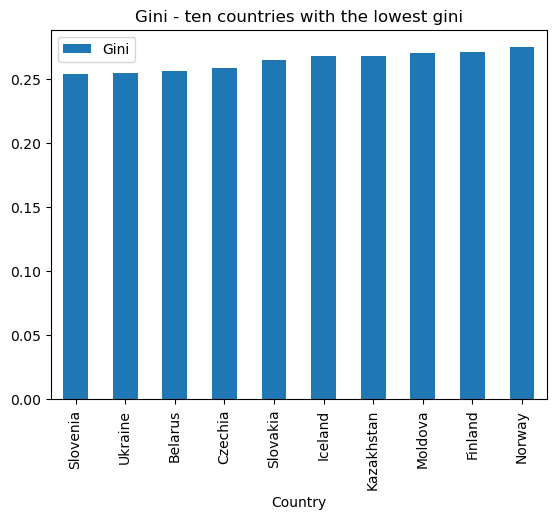

In [18]:
gini_low.plot(x='Country', y='Gini', kind='bar', title = "Gini - ten countries with the lowest gini")

<AxesSubplot:title={'center':'Gini - ten countries with the highest gini'}, xlabel='Country'>

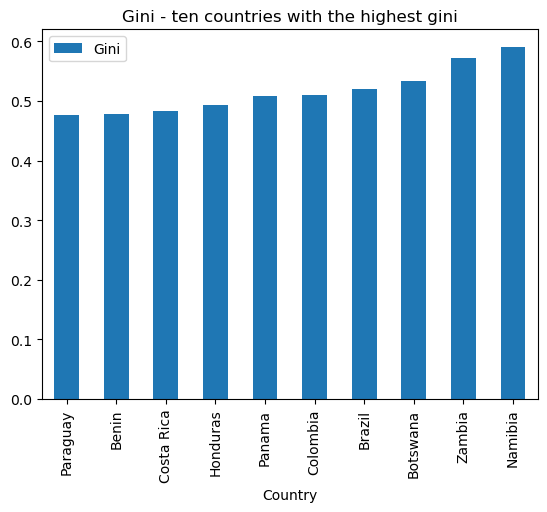

In [19]:
gini_high.plot(x='Country', y='Gini', kind='bar', title = "Gini - ten countries with the highest gini")

In [20]:
gdppc = dataset.sort_values(by = "GDP per capita", ascending = True)
gdppc_low = gdppc[0:10]
gdppc_high = gdppc[-10:]

<AxesSubplot:title={'center':'GDP per capita - bottom ten countries'}, xlabel='Country'>

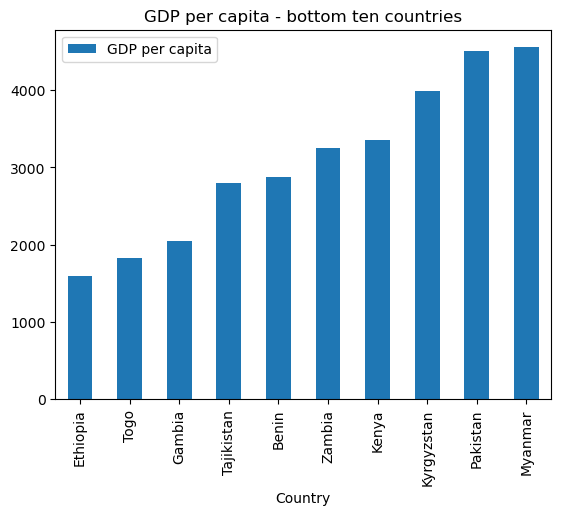

In [21]:
gdppc_low.plot(x='Country', y='GDP per capita', kind='bar', title = "GDP per capita - bottom ten countries")

<AxesSubplot:title={'center':'GDP per capita - top ten countries'}, xlabel='Country'>

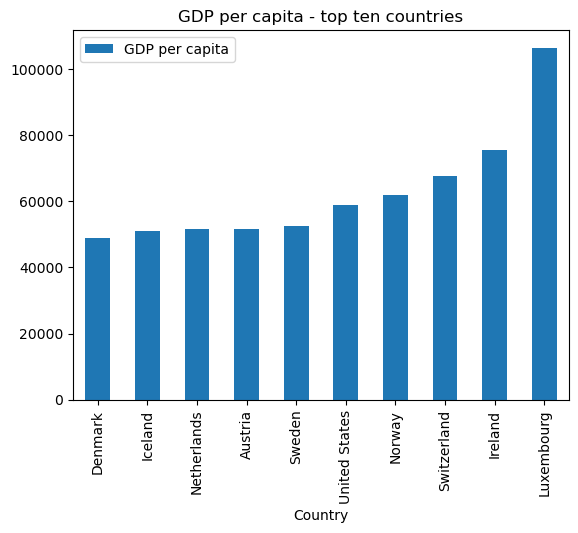

In [22]:
gdppc_high.plot(x='Country', y='GDP per capita', kind='bar', title = "GDP per capita - top ten countries")

In [23]:
corruption = dataset.sort_values(by = "Corruption_perception_index_2018", ascending = True)
corruption_high = corruption[0:10]
corruption_low = corruption[-10:]

<AxesSubplot:xlabel='Country'>

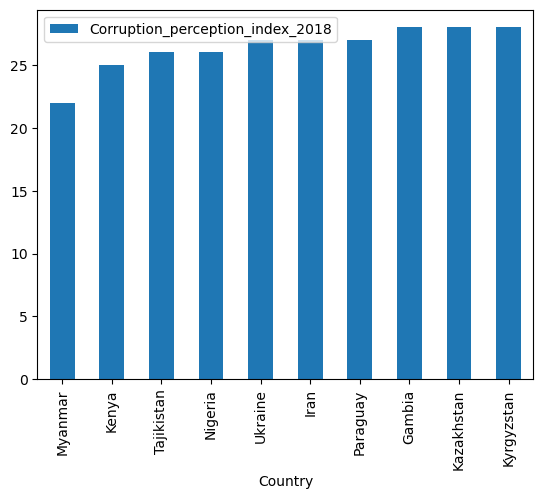

In [24]:
corruption_high.plot(x='Country', y='Corruption_perception_index_2018', kind='bar')

<AxesSubplot:xlabel='Country'>

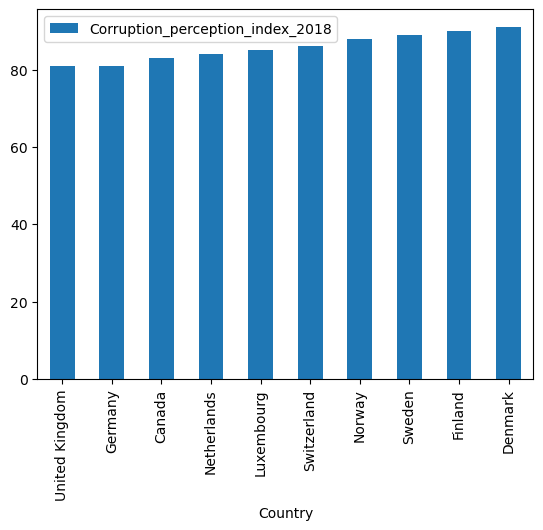

In [25]:
corruption_low.plot(x='Country', y='Corruption_perception_index_2018', kind='bar')

Text(0, 0.5, 'Gini index')

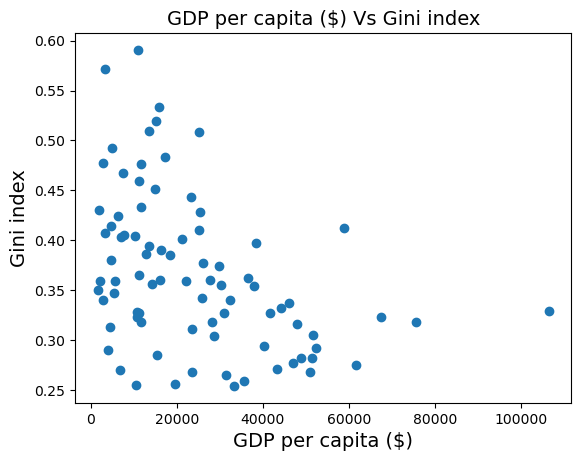

In [26]:
plt.scatter(dataset['GDP per capita'], dataset["Gini"])
plt.title('GDP per capita ($) Vs Gini index', fontsize=14)
plt.xlabel('GDP per capita ($)', fontsize=14)
plt.ylabel('Gini index', fontsize=14)

Text(0, 0.5, 'Gini index')

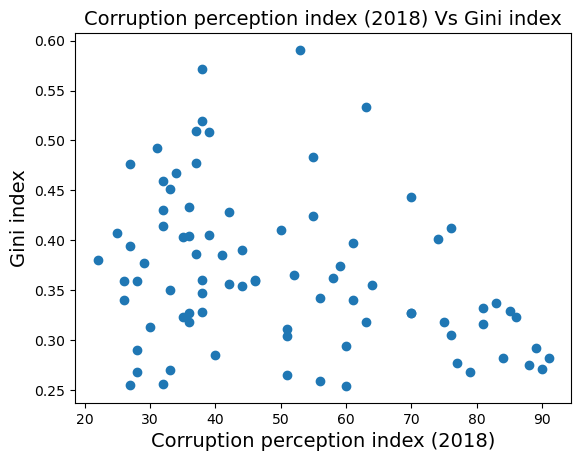

In [27]:
plt.scatter(dataset['Corruption_perception_index_2018'], dataset["Gini"])
plt.title('Corruption perception index (2018) Vs Gini index', fontsize=14)
plt.xlabel('Corruption perception index (2018)', fontsize=14)
plt.ylabel('Gini index', fontsize=14)

Text(0, 0.5, 'Corruption perception index (2018)')

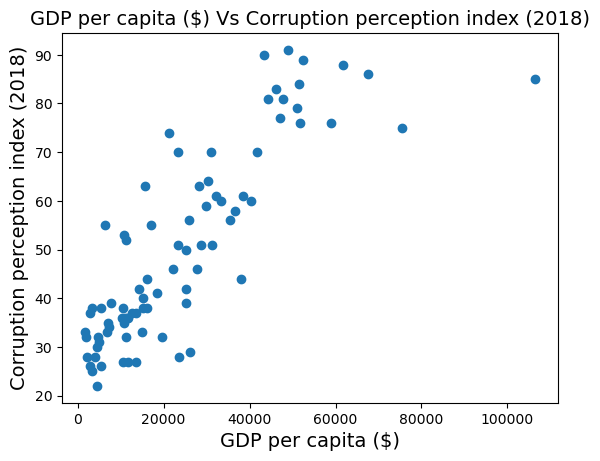

In [28]:
plt.scatter(dataset['GDP per capita'], dataset["Corruption_perception_index_2018"])
plt.title('GDP per capita ($) Vs Corruption perception index (2018)', fontsize=14)
plt.xlabel('GDP per capita ($)', fontsize=14)
plt.ylabel('Corruption perception index (2018)', fontsize=14)

# Research Method : regression analysis

#### Is there a relationship among GDP per capita, Gini Index and corruption index? The theory, and also the research question of this analysis is that country with High GDP per capita and low Gini index, also experience low levels of (percieved) corruption. The claim will be veriefied by using multivariate regression analysis.

## Regression analysis: GDP and Gini

In [81]:
model = LinearRegression()

## Regression analysis: Corruption perception and Gini

In [85]:
x = np.array(dataset["Gini"]).reshape(-1,1)
y = np.array(dataset['Corruption_perception_index_2018'])
model.fit(x,y)
score = model.score(x, y)
print(f"coefficient of determination: {score}")

coefficient of determination: 0.09948211964721787


## Regression analysis: GDP per capita and Corruption perception

In [86]:
x = np.array(dataset['GDP per capita']).reshape(-1,1)
y = np.array(dataset['Corruption_perception_index_2018'])
model.fit(x,y)
score = model.score(x, y)
print(f"coefficient of determination: {score}")

coefficient of determination: 0.7030574795236229


## Multiple Regression analysis

In [87]:
#Summary statistics
x = np.array(dataset["Gini"], dataset['GDP per capita'] )
y = np.array(dataset['Corruption_perception_index_2018'])
z = sm.add_constant(x)
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.788
Model:                            OLS   Adj. R-squared (uncentered):              0.786
Method:                 Least Squares   F-statistic:                              305.1
Date:                Wed, 22 Feb 2023   Prob (F-statistic):                    2.30e-29
Time:                        15:14:54   Log-Likelihood:                         -384.12
No. Observations:                  83   AIC:                                      770.2
Df Residuals:                      82   BIC:                                      772.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           127.3285      7.290     17.466      0.000     112.826     141.831
==============================================================================
Omnibus:                        8.248   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                5.843
Skew:                           0.516   Prob(JB):                       0.0539
Kurtosis:                       2.209   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""